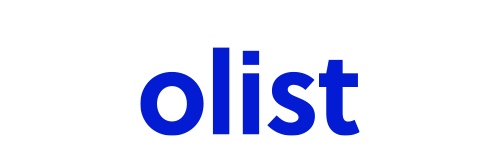

# Project description
This is a project based on Olist dataset. Olist is a store that insert small entrepreneurs on big brazilian e-commerces and its revenue comes from a percentage on each transaction of its sellers.<br><br>
This project will be divided in the following steps:<br>
- 1 Business problem<br>
- 2 Baseline definition<br>
- 3 Solution planning<br>
- 4 Collect data<br>
- 5 Exploratory data analysis<br>
- 6 Data preparation (for Machine Learning models)<br>
- 7 ML model trainning<br>
- 8 ML model performance analysis<br>
- 9 Coneversion of Machine Learning metrics into business metrics<br>
- 10 Publication of the solution<br>
- 11 Storytelling of the process and results<br>

# 1: Business problem
In this project i want to figure out if there is a big loss of sellers through time and the necessity of retention programs. If the answer is Yes, i will make a study to understand what variables impact more on sellers leaving and with this answer, make a predictive model to indicate what sellers has more probability to stop selling with Olist.

# 2: Baseline definition
Starting from the point that "stop selling" is being 90 days without any sell, a baseline to this business problem could be a simple choose of the sellers near of 90 days without selling, those who has more than 60 days for an exemple.

# 3: Solution planning
It will be used Microsoft Azure products (like Azure Data Lake Storage, Data Factory and Databricks) to make the data engineering for this project, besides Streamlit to show graphically the solution, python for all project and Pycaret to select the best Machine Learning model and to export the model's file that will be used on Streamlit to generate the predictions.

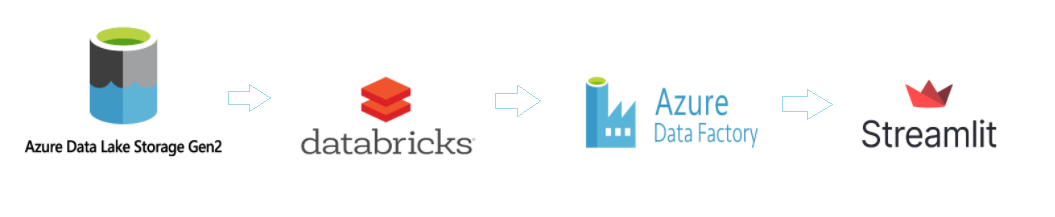

# 4: Collect data

Before we collect the data from azure datalake its important to mention <b>how i created the analytical base table.</b><br>
The Olist dataset is formed by 8 tables. I uploaded this 8 tables into my local Azure Data Studio to generate a query that returns 20 features of each seller. Below you can see the original tables:

In [60]:
#Imports
import numpy as np
import pandas as pd
import pyodbc
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from operator import attrgetter
from plotly.offline import plot, iplot
%matplotlib inline
import acessando_blob_storage as abs #python file created to access the datalake

import pickle
import cufflinks as cf
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from pycaret.classification import *

In [5]:
#conexao
def conexao_sql_server():
    server = 'LAPTOP-TA7HV3O7\SQLEXPRESS'
    database = 'olist'
    username = 'sa'
    password = 'XXX'
    string_conexao = 'Driver={SQL Server Native Client 11.0};Server='+server+';Database='+database+';UID='+username+';PWD='+password
    conexao = pyodbc.connect(string_conexao)
    return conexao

#conexao
conn = conexao_sql_server()

query1 = '''select top 10 * from olist_order_items_dataset'''
query2 = '''select top 10 * from olist_customers_dataset'''
query3 = '''select top 10 * from olist_geolocation_dataset'''
query4 = '''select top 10 * from olist_order_payments_dataset'''
query5 = '''select top 10 * from olist_order_reviews_dataset'''
query6 = '''select top 10 * from olist_orders_dataset'''
query7 = '''select top 10 * from olist_products_dataset'''
query8 = '''select top 10 * from olist_sellers_dataset'''

table1 = pd.read_sql(query1, conn)
table2 = pd.read_sql(query2, conn)
table3 = pd.read_sql(query3, conn)
table4 = pd.read_sql(query4, conn)
table5 = pd.read_sql(query5, conn)
table6 = pd.read_sql(query6, conn)
table7 = pd.read_sql(query7, conn)
table8 = pd.read_sql(query8, conn)

In [3]:
table1.head()

,"""order_id""","""order_item_id""","""product_id""","""seller_id""","""shipping_limit_date""","""price""","""freight_value"""
0,"""00010242fe8c5a6d1ba2dd792cb16214""",1,"""4244733e06e7ecb4970a6e2683c13e61""","""48436dade18ac8b2bce089ec2a041202""",2017-09-19 09:45:35,58.90,13.29
1,"""00018f77f2f0320c557190d7a144bdd3""",1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,"""000229ec398224ef6ca0657da4fc703e""",1,c777355d18b72b67abbeef9df44fd0fd,"""5b51032eddd242adc84c38acab88f23d""",2018-01-18 14:48:30,199.00,17.87
3,"""00024acbcdf0a6daa1e931b038114c75""",1,"""7634da152a4610f1595efa32f14722fc""","""9d7a1d34a5052409006425275ba1c2b4""",2018-08-15 10:10:18,12.99,12.79
4,"""00042b26cf59d7ce69dfabb4e55b4fd9""",1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
table2.head()

,"""customer_id""","""customer_unique_id""","""customer_zip_code_prefix""","""customer_city""","""customer_state"""
0,"""06278b75c68ad852923f6ef0773eb154""","""51254e30e483306de104997755d19537""","""22461""",rio de janeiro,RJ
1,"""8e64ee8a8087e2105aacb3eb1611242b""",b84cb3aaddc8ae670fb5935cfef5fa26,"""53140""",olinda,PE
2,"""2b91c0e00db628c7f3f8f581ebd9c4e6""",bec46d4f7dbf57b38055df36befed4e2,"""27580""",itatiaia,RJ
3,"""680043a09260a212d1dec021dd1efadc""",f2fa99f89acf8b2c2f63775d218def26,"""68193""",novo progresso,PA
4,"""7113efb0ff417de3c22fc3dec35f5b3c""",f2bd7baf91b52d05cb2a572f19bc9b1b,"""06663""",itapevi,SP


In [5]:
table3.head()

,"""geolocation_zip_code_prefix""","""geolocation_lat""","""geolocation_lng""","""geolocation_city""","""geolocation_state"""
0,"""01319""",-23.551666072162263,-46.6416210910324,sÃ£o paulo,SP
1,"""01323""",-23.56640335729583,-46.64203684477313,sao paulo,SP
2,"""01323""",-23.570092205256334,-46.64201953307684,sÃ£o paulo,SP
3,"""01311""",-23.558602661953913,-46.65986150236593,sao paulo,SP
4,"""01307""",-23.549079834583633,-46.65429504454956,sao paulo,SP


In [6]:
table4.head()

,"""order_id""","""payment_sequential""","""payment_type""","""payment_installments""","""payment_value"""
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,"""25e8ea4e93396b6fa0d3dd708e76c1bd""",1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,"""42fdf880ba16b47b59251dd489d4441a""",1,credit_card,2,128.45


In [7]:
table5.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [8]:
table6.head()

,"""order_id""","""customer_id""","""order_status""","""order_purchase_timestamp""","""order_approved_at""","""order_delivered_carrier_date""","""order_delivered_customer_date""","""order_estimated_delivery_date"""
0,e481f51cbdc54678b7cc49136f2d6af7,"""9ef432eb6251297304e76186b10a928d""",delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,"""53cdb2fc8bc7dce0b6741e2150273451""",b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,"""47770eb9100c2d0c44946d9cf07ec65d""","""41ce2a54c0b03bf3443c3d931a367089""",delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,"""949d5b44dbf5de918fe9c16f97b45f8a""",f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,"""8ab97904e6daea8866dbdbc4fb7aad2c""",delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
table7.head()

,"""product_id""","""product_category_name""","""product_name_lenght""","""product_description_lenght""","""product_photos_qty""","""product_weight_g""","""product_length_cm""","""product_height_cm""","""product_width_cm"""
0,"""1e9e8ef04dbcff4541ed26657ea517e5""",perfumaria,40,287,1,225,16,10,14
1,"""3aa071139cb16b67ca9e5dea641aaa2f""",artes,44,276,1,1000,30,18,20
2,"""96bd76ec8810374ed1b65e291975717f""",esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,"""9dc1a7de274444849c219cff195d0b71""",utilidades_domesticas,37,402,4,625,20,17,13


In [10]:
table8.head()

,"""seller_id""","""seller_zip_code_prefix""","""seller_city""","""seller_state"""
0,"""3442f8959a84dea7ee197c632cb2df15""","""13023""",campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,"""13844""",mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,"""20031""",rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,"""04195""",sao paulo,SP
4,"""51a04a8a6bdcb23deccc82b0b80742cf""","""12914""",braganca paulista,SP


From this 8 tables, i created the following query to provide the 20 features about the sellers:

In [50]:
abt = '''
select 
    tb2.["seller_id"] as [id_vendedor],
    max(tb1.["order_purchase_timestamp"]) as [data_pedido],
    tb4.["seller_state"] as [estado],
    (datediff(day, min(tb1.["order_approved_at"]), '2018-09-03')+1) as [dias_na_base],
    (datediff(day, min(tb1.["order_approved_at"]), max(tb1.["order_approved_at"]))+1) as [dias_atividade],
    count(distinct(cast(tb1.["order_approved_at"] as date))) as [datas_distintas_de_venda],
    cast(count(distinct(cast(tb1.["order_approved_at"] as date))) as numeric) / (datediff(day, min(tb1.["order_approved_at"]), max(tb1.["order_approved_at"]))+1) as [%_de_atividade],
    cast(count(distinct(tb2.["order_id"])) as numeric) / count(distinct(cast(tb1.["order_approved_at"] as date))) as [vendas_por_dia_de_atividade],
    avg(cast(tb3.[review_score] as numeric)) as [avaliacao_media],
    count(distinct(tb2.["order_id"])) as [qtd_pedidos],
    count(tb2.["product_id"]) as [qtd_produtos],
    cast(count(tb2.["product_id"]) as numeric) / count(distinct(tb2.["order_id"])) as [media_produtos_por_pedido],
    sum(cast(tb2.["price"] as numeric)) as [receita_total],
    sum(cast(tb2.["price"] as numeric)) / count(distinct(tb2.["order_id"])) as  [media_valor_pedido_sem_frete],
    (sum(cast(tb2.["price"] as numeric)) + sum(cast(tb2.["freight_value"] as numeric))) / count(distinct(tb2.["order_id"])) as  [media_valor_pedido_com_frete],
    sum(cast(tb2.["freight_value"] as numeric)) / count(distinct(tb2.["order_id"])) as  [media_valor_frete],
    (convert(decimal(5,1),sum(case when tb1.["order_delivered_customer_date"] > tb1.["order_estimated_delivery_date"] then 1 else 0 end)))/count(tb2.["seller_id"]) as [prop_pedidos_atrasados],
    datediff(day, max(tb1.["order_approved_at"]), '2018-09-03') as [dias_sem_vender],
    avg(datediff(day, (tb1.["order_delivered_carrier_date"]), tb2.["shipping_limit_date"])) as [tempo_de_postagem]
    from olist_orders_dataset tb1

    left join olist_order_items_dataset tb2 
    on tb1.["order_id"] = tb2.["order_id"] 

    left join olist_order_reviews_dataset tb3
    on tb1.["order_id"] = tb3.[order_id]
    
    left join olist_sellers_dataset tb4
    on tb2.["seller_id"] = tb4.["seller_id"]
    
    where tb1.["order_status"] = 'delivered' and tb1.["order_approved_at"] NOT LIKE ''
    group by tb2.["seller_id"], tb4.["seller_state"]
    HAVING (datediff(day, min(tb1.["order_approved_at"]), '2018-09-03')+1) > 90
'''   

vendedores = pd.read_sql(abt, conn)

In [51]:
vendedores.head()

,id_vendedor,data_pedido,estado,dias_na_base,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
0,c89cf7c468a48af70aada384e722f9e2,2018-08-06 14:31:24,RJ,454,426,14,0.032864,1.00000,4.000000,14,14,1.000000,745.0,53.214285,69.428571,16.214285,0.071429,28,2
1,d50d79cb34e38265a8649c383dcffd48,2018-08-10 10:56:10,SP,696,672,64,0.095238,1.09375,4.086956,70,70,1.000000,13013.0,185.900000,213.528571,27.628571,0.071429,24,4
2,ef990a83bbea832f36ebe81376335aa8,2018-08-12 18:43:51,SC,281,259,32,0.123552,1.34375,4.000000,43,44,1.023256,4646.0,108.046511,129.232558,21.186046,0.250000,22,3
3,"""4c8545742faaf58fafd5fd14d25d75cf""",2018-05-19 18:08:37,SP,173,66,4,0.060606,1.00000,NaN,4,4,1.000000,3020.0,755.000000,804.000000,49.000000,0.000000,107,4
4,"""165fc07beebdcb6190fba8a06db2a449""",2018-08-14 17:42:23,PR,392,372,47,0.126344,1.06383,3.500000,50,64,1.280000,17484.0,349.680000,381.660000,31.980000,0.125000,20,2


Below are some data processing

In [52]:
#rounding float64 columns
float_columns = list(vendedores.select_dtypes(include='float64').columns)
vendedores[float_columns] = np.round(vendedores[float_columns], decimals = 2)

#input average from 1 to 5 for sellers without rating
vendedores['avaliacao_media'] = vendedores['avaliacao_media'].fillna(2.5)

#creating labels for sellers with more than 90 days without selling
vendedores['target'] = (vendedores['dias_sem_vender'] > 90)

#replacing values to 0 and 1
vendedores.loc[:, 'target'].replace({False: 0}, inplace=True)
vendedores.loc[:, 'target'].replace({True: 1}, inplace=True)

#get just the date (month)
vendedores['data_pedido'] = [i[0:7] for i in vendedores['data_pedido']]
#transforming into datetime
vendedores['data_pedido'] = pd.to_datetime(vendedores['data_pedido'])

In [53]:
vendedores.head()

,id_vendedor,data_pedido,estado,dias_na_base,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem,target
0,c89cf7c468a48af70aada384e722f9e2,2018-08-01,RJ,454,426,14,0.03,1.00,4.00,14,14,1.00,745.0,53.21,69.43,16.21,0.07,28,2,0
1,d50d79cb34e38265a8649c383dcffd48,2018-08-01,SP,696,672,64,0.10,1.09,4.09,70,70,1.00,13013.0,185.90,213.53,27.63,0.07,24,4,0
2,ef990a83bbea832f36ebe81376335aa8,2018-08-01,SC,281,259,32,0.12,1.34,4.00,43,44,1.02,4646.0,108.05,129.23,21.19,0.25,22,3,0
3,"""4c8545742faaf58fafd5fd14d25d75cf""",2018-05-01,SP,173,66,4,0.06,1.00,2.50,4,4,1.00,3020.0,755.00,804.00,49.00,0.00,107,4,1
4,"""165fc07beebdcb6190fba8a06db2a449""",2018-08-01,PR,392,372,47,0.13,1.06,3.50,50,64,1.28,17484.0,349.68,381.66,31.98,0.12,20,2,0


This analytical base table were exported to Azure datalake where we can access and use this data to make predictions and other jobs. Below is the code to download a file from the datalake

In [ ]:
abs.download_blob('presentation', 'tb_base.csv', 'tb_base.csv') #download the database from datalake

# 5 Exploratory Data Analysis

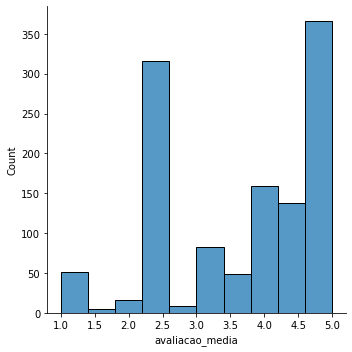

In [23]:
#checking ratings distribution of sellers who are more than 90 days without selling
left = vendedores.loc[vendedores['target']==1]
sns.displot(left['avaliacao_media'], bins=10)

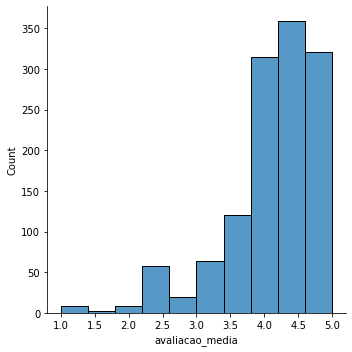

In [24]:
#checking ratings distribution of sellers who are more than 90 days without selling
not_left = vendedores.loc[vendedores['target']==0]
sns.displot(not_left['avaliacao_media'], bins=10)

Here we can see that as expected, the sellers who left olist have worst rating 

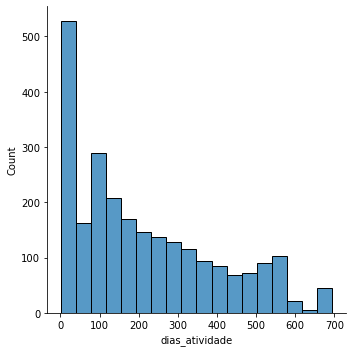

In [27]:
#distribution of active days of the sellers (difference by the first sell date and the last)
sns.displot(vendedores, x="dias_atividade")

Most of the sellers has less than 50 days of activity

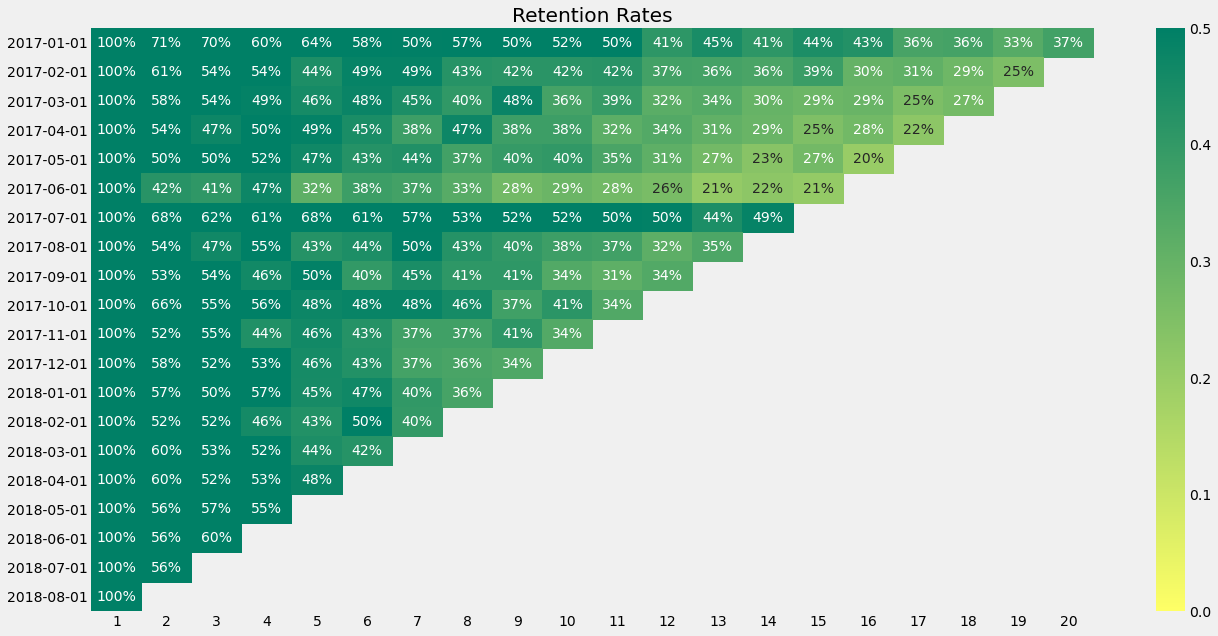

In [30]:
query2 = '''
select 
tb1.["order_id"] as [order_id],
tb1.["order_purchase_timestamp"] as [order_purchase_timestamp],
cast(["price"] as float) + cast(["freight_value"] as float) as [total_pago],
tb2.["seller_id"] as [seller_id]
from [olist_orders_dataset] tb1
full OUTER join [olist_order_items_dataset] tb2
on tb1.["order_id"] = tb2.["order_id"]
'''

#read query
vendas = pd.read_sql(query2, conn)

#transforming into datetime
vendas['order_purchase_timestamp'] = pd.to_datetime(vendas['order_purchase_timestamp'])

#get month
vendas['order_months'] = vendas['order_purchase_timestamp'].dt.to_period('M') #Criar coluna Ano/Mês

#get the first sell grouping by seller and month
vendas['cohorts'] = vendas.groupby('seller_id')['order_months'].transform('min') #Criar campo com primeiro mês de venda

#dataframe to get sells, amount paid and unique orders by unique seller
cohorts_data = vendas.reset_index()\
                     .groupby(['cohorts', 'order_months'])\
                     .agg(SellerCount = ('seller_id', 'nunique'),
                          Revenue = ('total_pago', 'sum'),
                          Orders = ('order_id', 'nunique'))\
                     .reset_index()

#periods where the seller keeps selling
cohorts_data['periods'] = (cohorts_data.order_months - cohorts_data.cohorts).apply(attrgetter('n')) 

#droping the first days of a incomplete year
cohorts_data.drop(cohorts_data.head(45).index, inplace=True)

#droping last month off database which is also incomplete
cohorts_data.drop(cohorts_data.loc[cohorts_data['order_months']=='2018-09'].index, inplace=True)

#transforming into string
cohorts_data['cohorts'] = cohorts_data['cohorts'].astype(str)
#transforming again into datetime
cohorts_data['cohorts'] = pd.to_datetime(cohorts_data['cohorts'])
cohorts_data['order_months'] = cohorts_data['order_months'].astype(str)
cohorts_data['order_months'] = pd.to_datetime(cohorts_data['order_months'])

#function to get month and year
def get_month(x): return dt.datetime(x.year, x.month, 1)

#applying function
vendas['SalesMonth'] = vendas['order_purchase_timestamp'].apply(get_month)

#grouping values
grouping = vendas.groupby('seller_id')['SalesMonth']
#get min sales month value
vendas['CohortMonth'] = grouping.transform('min')

#function to get date parts
def get_date_int(vendas, column):
    year = vendas[column].dt.year
    month = vendas[column].dt.month
    day = vendas[column].dt.day
    return year, month, day

#get date of sales
sale_year, sale_month, sale_day = get_date_int(vendas, 'SalesMonth')

#get date of period that sellers stop selling
cohort_year, cohort_month, cohort_day = get_date_int(vendas, 'CohortMonth')

#difference of years
years_diff = sale_year - cohort_year

#difference of months
months_diff = sale_month - cohort_month

#get index
vendas['CohortIndex'] = years_diff * 12 + months_diff + 1

#grouping 
grouping = vendas.groupby(['CohortMonth', 'CohortIndex'])

#get unique sellers
cohort_data = grouping['seller_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

#count values
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='seller_id')

#get sizes
cohort_sizes = cohort_counts.iloc[:,0]

#get percentages
retention = cohort_counts.divide(cohort_sizes, axis=0)

#set date as index
retention.index=retention.index.date


#sns.set()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.title('Retention Rates')

sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax=0.5,
           cmap='summer_r')
plt.show()

Here we can see a very powerfull information: on the horizontal vision we see the months where sellers does the first sell (2017-01-01, 2017-02-01 and so on..), and verticaly we see the a timeline. So, <b>from the sellers who enter Olist and start selling in 2017-01-01, 71% keeps selling in the second month. From the sellers who enter Olist and start selling in 2017-02-01, 61% keeps selling in the second month</b>.<br><br>
We can see that <b>in the second month, we lost about 46% of activity from the sellers</b>. It means that a lot of sellers, make sells on the first period but dont keep selling, so we may have a problem of retention here (sellers can not keep selling effectively thorugh time)

In [57]:
#query to get first date of sells
query3 = '''select 
tb2.["seller_id"] as [vendedor],
min(tb1.["order_purchase_timestamp"]) as [data_pedido]
from olist_orders_dataset tb1
left join olist_order_items_dataset tb2
on tb2.["order_id"] = tb1.["order_id"]
group by tb2.["seller_id"]'''

#read query
query3 = pd.read_sql(query3, conn)

#get just date
query3['data_pedido'] = [i[0:7] for i in query3['data_pedido']]

#object to datetime
query3['data_pedido'] = pd.to_datetime(query3['data_pedido'])

#get unique dates
sellers_in = pd.DataFrame(query3.groupby('data_pedido')['vendedor'].nunique()).reset_index()

#get just sellers who left
sellers_out = vendedores.loc[vendedores['target']==1]
#last date of selling is 'data_pedido'
sellers_out = sellers_out[['id_vendedor', 'data_pedido']]
#get unique dates
sellers_out = pd.DataFrame(sellers_out.groupby('data_pedido')['id_vendedor'].nunique()).reset_index()

#merging dataframes
sellers_in_out = pd.merge(sellers_in, sellers_out, on='data_pedido', how='outer')

#rename columns
sellers_in_out = sellers_in_out.rename(columns={'vendedor': 'sellers_in', 'id_vendedor': 'sellers_out'})

#dropping incomplete periods
sellers_in_out.drop(sellers_in_out.tail(3).index,inplace=True)
sellers_in_out.drop(sellers_in_out.head(3).index,inplace=True)

px.line(sellers_in_out, x="data_pedido", y=["sellers_in", "sellers_out"], title='Sellers In vs Sellers Out')

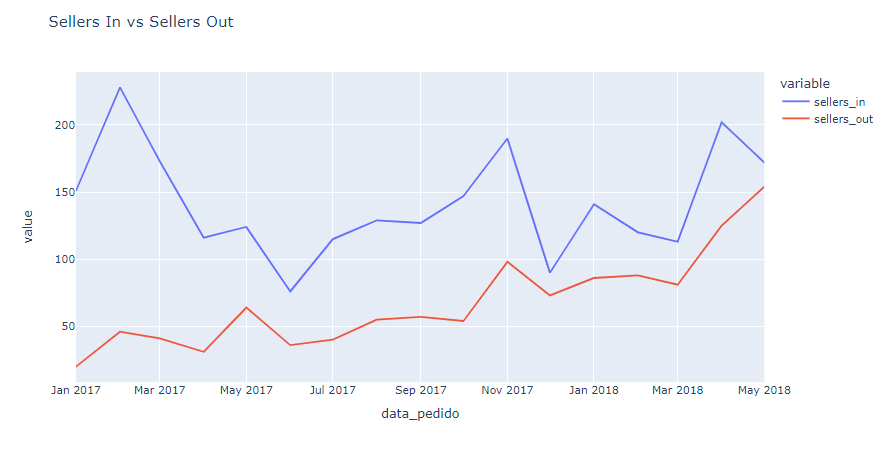

We have a great number of sellers coming to Olist but the number of sellers stop selling is in an exponencial curve, so we need to make some strategies to identify this sellers and take some action before they leave

# 6 Data preparation, Machine Learning model trainning and performance

In [59]:
#cross validation function
def cross_validation(clf, x, y):
    resultados = cross_val_predict(clf, x, y, cv=10)
    return print(metrics.classification_report(y, resultados))

### Testing with Decision Tree and not scalling data

In [63]:
x = vendedores.drop(columns=['id_vendedor', 'data_pedido', 'avaliacao_media', 'dias_sem_vender', 'target', 'estado', 'dias_na_base'])
y = vendedores['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_predito = tree.predict(x_test)

print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       422
           1       0.72      0.71      0.72       393

    accuracy                           0.73       815
   macro avg       0.73      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815



In [64]:
#for loop to check performance with different max depth of decision tree
lista_max_depth = np.arange(1, 13).tolist()

for i in lista_max_depth:
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0, stratify=y)
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(x_train, y_train)
    y_predito = tree.predict(x_test)
    resultados = cross_val_predict(tree, x, y, cv=cv)
    print('Teste com: {:.1f}'.format(i), metrics.classification_report(y, resultados))

Teste com: 1.0               precision    recall  f1-score   support

           0       0.68      0.97      0.80      1277
           1       0.95      0.51      0.66      1192

    accuracy                           0.75      2469
   macro avg       0.81      0.74      0.73      2469
weighted avg       0.81      0.75      0.73      2469

Teste com: 2.0               precision    recall  f1-score   support

           0       0.75      0.74      0.75      1277
           1       0.73      0.73      0.73      1192

    accuracy                           0.74      2469
   macro avg       0.74      0.74      0.74      2469
weighted avg       0.74      0.74      0.74      2469

Teste com: 3.0               precision    recall  f1-score   support

           0       0.70      0.92      0.80      1277
           1       0.87      0.58      0.70      1192

    accuracy                           0.76      2469
   macro avg       0.79      0.75      0.75      2469
weighted avg       0.78      

Max depth = 11 had better performance

### Testing with min samples leaf

In [66]:
#2
tree = DecisionTreeClassifier(min_samples_leaf=2)
tree.fit(x_train, y_train)
y_predito = tree.predict(x_test)

cross_validation(tree, x, y)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1277
           1       0.73      0.69      0.71      1192

    accuracy                           0.73      2469
   macro avg       0.73      0.72      0.72      2469
weighted avg       0.73      0.73      0.73      2469



In [67]:
#4
tree = DecisionTreeClassifier(min_samples_leaf=4)
tree.fit(x_train, y_train)
y_predito = tree.predict(x_test)

cross_validation(tree, x, y)

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1277
           1       0.73      0.69      0.71      1192

    accuracy                           0.73      2469
   macro avg       0.73      0.73      0.73      2469
weighted avg       0.73      0.73      0.73      2469



In [68]:
#6
tree = DecisionTreeClassifier(min_samples_leaf=6)
tree.fit(x_train, y_train)
y_predito = tree.predict(x_test)

cross_validation(tree, x, y)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1277
           1       0.74      0.70      0.72      1192

    accuracy                           0.74      2469
   macro avg       0.74      0.74      0.74      2469
weighted avg       0.74      0.74      0.74      2469



In [69]:
#10
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(x_train, y_train)
y_predito = tree.predict(x_test)

cross_validation(tree, x, y)

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1277
           1       0.74      0.70      0.72      1192

    accuracy                           0.74      2469
   macro avg       0.74      0.74      0.74      2469
weighted avg       0.74      0.74      0.74      2469



Min samples leaf = 6 had the best performance

### Feature importances

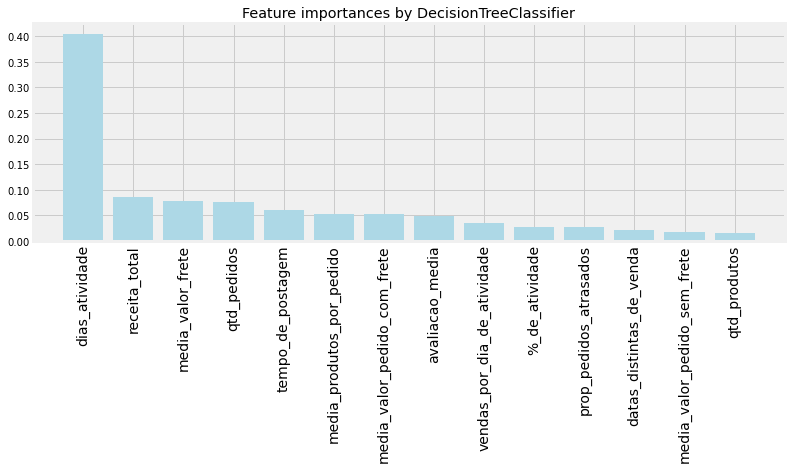

In [71]:
#basic model
tree = DecisionTreeClassifier()
x = vendedores.drop(columns=['id_vendedor', 'data_pedido', 'dias_sem_vender', 'target', 'estado', 'dias_na_base'], axis=1)
y = vendedores['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, stratify=y)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)


#feature importances
importances = tree.feature_importances_
feat_names = vendedores.drop(['target', 'data_pedido', 'id_vendedor', 'estado', 'dias_sem_vender', 'dias_na_base'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

These first 4 features are the most important to the model and has more impact on the classification

### Function to get the accuracy and its interval of confidence

In [74]:
#5 folds and shuffle = True to "mix the data"
cv = KFold(n_splits=5, shuffle=True)

resultados = cross_val_score(tree, x, y, cv=cv, scoring='accuracy')

def intervalo(resultados):
    media = resultados.mean()
    dv = resultados.std()
    print('A acurácia média é: {:.2f}%'.format(media))
    print('O intervalo é de: [{:.2f}% ~ {:.2f}%]'.format((media - 2*dv)*100, (media + 2*dv)*100))

intervalo(resultados)    

A acurácia média é: 0.71%
O intervalo é de: [68.59% ~ 73.50%]


### Testing 4 different models

In [76]:
rf = RandomForestClassifier()
svc = SVC()
lr = LogisticRegression()
tree = DecisionTreeClassifier(max_depth=6)

lista_models = [rf, svc, lr, tree]

for i in lista_models:
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0, stratify=y)
    resultados = cross_val_predict(tree, x, y, cv=cv)
    print('Teste com: ', i, metrics.classification_report(y, resultados))

Teste com:  RandomForestClassifier()               precision    recall  f1-score   support

           0       0.72      0.83      0.77      1277
           1       0.78      0.65      0.71      1192

    accuracy                           0.74      2469
   macro avg       0.75      0.74      0.74      2469
weighted avg       0.75      0.74      0.74      2469

Teste com:  SVC()               precision    recall  f1-score   support

           0       0.72      0.84      0.77      1277
           1       0.79      0.65      0.71      1192

    accuracy                           0.74      2469
   macro avg       0.75      0.74      0.74      2469
weighted avg       0.75      0.74      0.74      2469

Teste com:  LogisticRegression()               precision    recall  f1-score   support

           0       0.72      0.82      0.76      1277
           1       0.77      0.65      0.71      1192

    accuracy                           0.74      2469
   macro avg       0.74      0.74      0

Decision Tree performs better

### Measuring performance through ROC curve

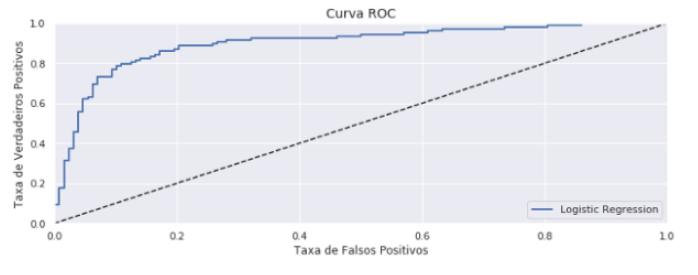

Roc curve show the relationship between true positive rate and false positives. The further top left is the curve, better is the model, because it is hitting the true positive cases and not hitting false negatives.<br><br>
The metric to be analysed in ROC curve is the Area under the curve (AUC). The closest is the AUC to 1, means that the model is more inside the curve, getting closer to the top left of the chart, so the better is the model.

In [79]:
#base model but scalling data
x = vendedores.drop(columns=['id_vendedor', 'data_pedido', 'avaliacao_media', 'dias_sem_vender', 'target', 'estado', 'dias_na_base'])
y = vendedores.target
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0, stratify=y)
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(x_train, y_train)
y_predito = tree.predict(x_test)

#function to get AUC
def roc_classification_report_results(model, y_test, y_predito):
    roc_ = roc_auc_score(y_test, y_predito)
    classfication_report = classification_report(y_test, y_predito)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)
    

roc_classification_report_results(tree, y_test, y_predito)


DecisionTreeClassifier(max_depth=6) AUC = 0.7458787067520471

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       422
           1       0.80      0.64      0.71       393

    accuracy                           0.75       815
   macro avg       0.76      0.75      0.75       815
weighted avg       0.76      0.75      0.75       815



In [81]:
# Testing with logistic regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0, stratify=y)

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predito = lr.predict(x_test)

roc_classification_report_results(lr, y_test, y_predito)


LogisticRegression() AUC = 0.7221198180882461

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       639
           1       0.72      0.69      0.71       596

    accuracy                           0.72      1235
   macro avg       0.72      0.72      0.72      1235
weighted avg       0.72      0.72      0.72      1235



Decision tree had a better AUC

### Testing models with Pycaret

In [82]:
#setup
s = setup (vendedores[['dias_atividade', 'datas_distintas_de_venda',\
                       '%_de_atividade', 'vendas_por_dia_de_atividade',\
                       'qtd_pedidos', 'qtd_produtos',\
                       'media_produtos_por_pedido', 'receita_total',\
                       'media_valor_pedido_sem_frete', 'media_valor_pedido_com_frete',\
                       'media_valor_frete', 'prop_pedidos_atrasados', 'tempo_de_postagem', 'target']],
           target='target',
           numeric_features = ['dias_atividade', 'datas_distintas_de_venda',\
                       '%_de_atividade', 'vendas_por_dia_de_atividade',\
                       'qtd_pedidos', 'qtd_produtos',\
                       'media_produtos_por_pedido', 'receita_total',\
                       'media_valor_pedido_sem_frete', 'media_valor_pedido_com_frete',\
                       'media_valor_frete', 'prop_pedidos_atrasados', 'tempo_de_postagem'],
           normalize = True,
           normalize_method = 'minmax'
          )

,Description,Value
0,session_id,4393
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2469, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Here we can pass a lot of settings to the model like remove outliers, fix imbalance, fix imbalance method, normalization method, etc. So Pycaret is a boost of productivity

In [86]:
#comparing multiple models by AUC score
best = compare_models(fold = 10, sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7645,0.8537,0.6691,0.8043,0.7290,0.5240,0.5322,0.1000
lightgbm,Light Gradient Boosting Machine,0.7616,0.8506,0.6983,0.7783,0.7352,0.5197,0.5232,0.1100
rf,Random Forest Classifier,0.7506,0.8469,0.6630,0.7802,0.7154,0.4964,0.5029,0.1520
et,Extra Trees Classifier,0.7575,0.8456,0.6680,0.7915,0.7229,0.5104,0.5177,0.1230
ada,Ada Boost Classifier,0.7570,0.8364,0.6545,0.7993,0.7184,0.5086,0.5175,0.0570
nb,Naive Bayes,0.7402,0.8318,0.6692,0.7803,0.7088,0.4772,0.4967,0.0080
qda,Quadratic Discriminant Analysis,0.7298,0.8282,0.6060,0.8030,0.6780,0.4533,0.4817,0.0080
lda,Linear Discriminant Analysis,0.7222,0.8165,0.6702,0.7265,0.6955,0.4410,0.4437,0.0090
knn,K Neighbors Classifier,0.7448,0.8136,0.6654,0.7691,0.7120,0.4852,0.4907,0.0200
lr,Logistic Regression,0.7107,0.8118,0.6775,0.7062,0.6891,0.4189,0.4213,0.0110


Here we have a great gain of performance (AUC) using Gradient Boosting Classifier instead Decision Tree, 0.1369 points.

In [87]:
#creating model
gbc = create_model('gbc', fold=10)
#finalizing model
final_model = finalize_model(gbc)
#saving
save_model(final_model, 'final_model')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7977,0.8948,0.7439,0.8133,0.7771,0.5926,0.5945
1,0.8092,0.8550,0.6585,0.9153,0.7660,0.6121,0.6358
2,0.6821,0.7924,0.5976,0.6901,0.6405,0.3582,0.3612
3,0.7977,0.8822,0.7317,0.8219,0.7742,0.5921,0.5953
4,0.7168,0.8006,0.5732,0.7705,0.6573,0.4247,0.4382
5,0.7572,0.8435,0.6098,0.8333,0.7042,0.5066,0.5244
6,0.7861,0.8581,0.7108,0.8194,0.7613,0.5693,0.5741
7,0.7514,0.8570,0.6627,0.7857,0.7190,0.4990,0.5048
8,0.7326,0.8390,0.6341,0.7647,0.6933,0.4599,0.4662
9,0.8140,0.9142,0.7683,0.8289,0.7975,0.6259,0.6274


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['dias_atividade',
                                                           'datas_distintas_de_venda',
                                                           '%_de_atividade',
                                                           'vendas_por_dia_de_atividade',
                                                           'qtd_pedidos',
                                                           'qtd_produtos',
                                                           'media_produtos_por_pedido',
                                                           'receita_total',
                                        

In [ ]:
#uploading model into datalake
abs.upload_blob('presentation', 'final_model.pkl', 'final_model.pkl')

### Clustering sellers to understand the groups of different behaviour

1 7406.999999999999
2 5574.59724637169
3 4211.514942407875
4 3173.0360497785646
5 2684.0781966180543
6 2346.4930759043077
7 2023.2550985864787


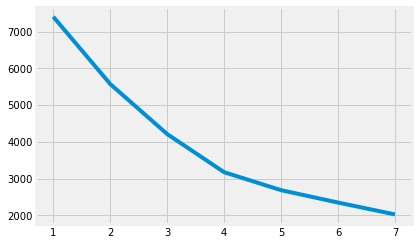

In [91]:
#get just 3 variables to cluster sellers
cluster_data = vendedores[['dias_atividade', 'media_valor_pedido_sem_frete', 'media_produtos_por_pedido']]
cluster_data = cluster_data.rename(columns={'dias_atividade':'dias_atvd', 'media_valor_pedido_sem_frete':'media_R$_pedido',\
                                            'media_produtos_por_pedido': 'media_produtos_pedido'})

#scaling data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

#checking best number of clusters with elbow method
lista = []
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, init='random', max_iter=50)
    kmeans.fit(cluster_data_scaled)
    print(i, kmeans.inertia_)
    lista.append(kmeans.inertia_)

plt.plot(range(1,8), lista)

In [ ]:
The best cluster number here is 4. After that, the curve dont go down to much, tends to stabilize

In [93]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_data_scaled)
labels = kmeans.labels_
cluster_data['cluster'] = labels
cluster_data.head()

,dias_atvd,media_R$_pedido,media_produtos_pedido,cluster
0,426,53.21,1.00,1
1,672,185.90,1.00,1
2,259,108.05,1.02,0
3,66,755.00,1.00,0
4,372,349.68,1.28,1


In [94]:
px.scatter_3d(cluster_data, x='media_produtos_pedido', y='media_R$_pedido', z='dias_atvd', color='cluster')

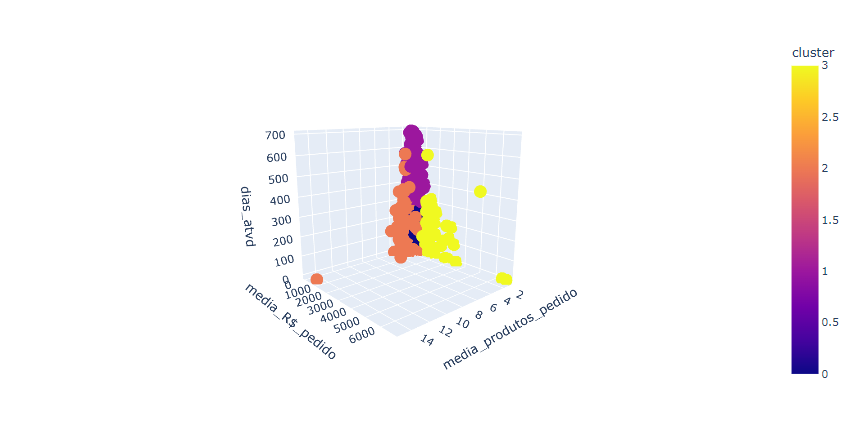

Here we can see that, 4 clusters is not good visualy. We can't distinguish cluster 2 from the clusters 0 and 1 very well. So lets, turn it into just 3 clusters

In [95]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_data_scaled)
labels = kmeans.labels_
cluster_data['cluster'] = labels
cluster_data.head()

,dias_atvd,media_R$_pedido,media_produtos_pedido,cluster
0,426,53.21,1.00,0
1,672,185.90,1.00,0
2,259,108.05,1.02,1
3,66,755.00,1.00,1
4,372,349.68,1.28,0


In [96]:
px.scatter_3d(cluster_data, x='media_produtos_pedido', y='media_R$_pedido', z='dias_atvd', color='cluster')

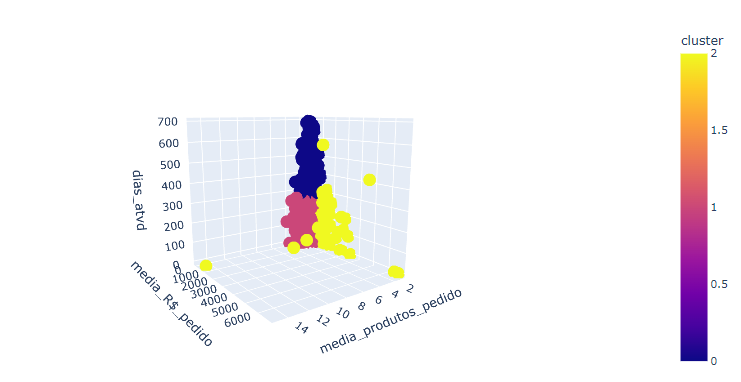

Thats better!<br>
Here we have:<br> 
<b>Cluster 0 (blue):</b> sellers with a lot of days of activity but has low average ticket.<br>
<b>Cluster 1 (pink):</b> sellers with less days off activy and low average ticket<br>
<b>Cluster 2 (yellow):</b> sellers with few days of activity (most part) but high average ticket and some of them have algo more average products by order

With this separation we have groups of interest to olist to choose wich group deserves more attention or priority

In [ ]:
#Saving the cluster model
joblib.dump(kmeans, 'cluster.joblib')

#uploading cluster into datalake
abs.upload_blob('presentation', 'cluster.joblib', 'cluster.joblib')

So lets make all process together

In [99]:
#CLUSTERING
features_cluster = vendedores[['media_produtos_por_pedido', 'media_valor_pedido_sem_frete', 'dias_atividade']]
scaler = StandardScaler()
features_cluster = scaler.fit_transform(features_cluster)
kmeans = KMeans(n_clusters=3)
kmeans.fit(features_cluster)
features_cluster = pd.DataFrame(features_cluster)
features_cluster.rename(columns={0:'media_produtos_por_pedido', 1:'media_valor_pedido_sem_frete', 2:'dias_de_atividade'}, inplace=True)
features_cluster['cluster'] = kmeans.labels_
#------------------------------------------------------------

#CLASSIFICATION MODEL
#setup
s = setup (vendedores[['dias_atividade', 'datas_distintas_de_venda',\
                       '%_de_atividade', 'vendas_por_dia_de_atividade',\
                       'qtd_pedidos', 'qtd_produtos',\
                       'media_produtos_por_pedido', 'receita_total',\
                       'media_valor_pedido_sem_frete', 'media_valor_pedido_com_frete',\
                       'media_valor_frete', 'prop_pedidos_atrasados', 'tempo_de_postagem', 'target']],
           target='target',
           numeric_features = ['dias_atividade', 'datas_distintas_de_venda',\
                       '%_de_atividade', 'vendas_por_dia_de_atividade',\
                       'qtd_pedidos', 'qtd_produtos',\
                       'media_produtos_por_pedido', 'receita_total',\
                       'media_valor_pedido_sem_frete', 'media_valor_pedido_com_frete',\
                       'media_valor_frete', 'prop_pedidos_atrasados', 'tempo_de_postagem'],
           normalize = True,
           normalize_method = 'minmax',
           data_split_stratify = True,
           fix_imbalance = True,
           silent=True,
           verbose=False
          )

best = compare_models(fold = 10, sort = 'AUC')
gbc = create_model('gbc', fold=10)
final_model = finalize_model(gbc)




#final dataframe with all columns
df_final = vendedores[['id_vendedor', 'estado', 'dias_na_base', 'dias_atividade',\
                       'datas_distintas_de_venda', '%_de_atividade',\
                       'vendas_por_dia_de_atividade', 'avaliacao_media', 'qtd_pedidos',\
                       'qtd_produtos', 'media_produtos_por_pedido', 'receita_total',\
                       'media_valor_pedido_sem_frete', 'media_valor_pedido_com_frete',\
                       'media_valor_frete', 'prop_pedidos_atrasados', 'dias_sem_vender',\
                       'tempo_de_postagem']]

#generating predictions
df_final = predict_model(best, data=df_final, raw_score=True)
#getting cluster column
clusters = features_cluster.filter(like='cluster')
#concatenating with original dataframe
df_final = pd.concat([df_final, clusters], axis=1)
#get "target" column to use as filter
target = vendedores.filter(like='target')
#concat with final dataframe
df_final = pd.concat([df_final, target], axis=1)
#filtering just those who has high probability to leave and not left yet
df_final_final = df_final[(df_final.target==0) & (df_final.Label==1)]
#drop target column
df_final_final = df_final_final.drop('target', axis=1)
df_final_final

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7977,0.8829,0.7590,0.8077,0.7826,0.5938,0.5948
1,0.7861,0.8768,0.7711,0.7805,0.7758,0.5714,0.5714
2,0.7457,0.8336,0.6747,0.7671,0.7179,0.4881,0.4914
3,0.7630,0.8791,0.6867,0.7917,0.7355,0.5228,0.5271
4,0.7977,0.9002,0.6905,0.8657,0.7682,0.5927,0.6047
5,0.7746,0.8624,0.7024,0.8082,0.7516,0.5471,0.5516
6,0.7341,0.7762,0.5952,0.8065,0.6849,0.4638,0.4799
7,0.7572,0.8145,0.6548,0.8088,0.7237,0.5114,0.5205
8,0.7907,0.8660,0.7108,0.8310,0.7662,0.5788,0.5846
9,0.7384,0.8324,0.6747,0.7568,0.7134,0.4742,0.4768


,id_vendedor,estado,dias_na_base,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,...,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem,Label,Score_0,Score_1,cluster
44,"""461ff5303b6c9c1a4a07f40c5aece516""",PR,192,141,3,0.02,1.00,2.50,3,3,...,34.33,53.67,19.33,0.00,51,3,1,0.3241,0.6759,0
87,b274baf5bbd142410eb2958cf685d684,RS,111,66,6,0.09,1.17,3.00,7,7,...,83.71,104.86,21.14,0.00,45,7,1,0.3816,0.6184,0
97,b87a7ea0c30fad2dd6781b74a0064859,SP,237,174,9,0.05,1.00,3.33,9,9,...,57.33,70.89,13.56,0.33,63,4,1,0.4811,0.5189,0
139,"""64cc804291f90c81f02bfc2bb58ff55a""",PR,142,96,2,0.02,1.00,2.50,2,2,...,259.00,282.00,23.00,0.00,46,2,1,0.4161,0.5839,0
144,be3b4b0f050a6aa1b2d901c4b77e979f,PR,131,44,3,0.07,1.00,5.00,3,8,...,193.00,244.33,51.33,0.00,87,3,1,0.0324,0.9676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,"""397c4d0c005b6f41f90098ac724e28cb""",SP,147,117,5,0.04,1.00,5.00,5,5,...,1635.40,1724.40,89.00,0.40,30,1,1,0.4432,0.5568,2
2441,b43d8b707f887a30f4675391098354a0,SP,150,108,3,0.03,1.00,2.33,3,4,...,447.33,508.67,61.33,0.25,42,2,1,0.4506,0.5494,0
2449,"""883dd81e82754ac2c65e9790a7db8c9a""",PR,314,242,5,0.02,1.00,2.00,5,5,...,64.00,78.80,14.80,0.00,72,4,1,0.3991,0.6009,0
2454,"""8060d731897e33b5c5ae575ce1e209e1""",SP,120,69,5,0.07,1.00,2.50,5,5,...,40.00,58.00,18.00,0.00,51,3,1,0.4150,0.5850,0


The dataset above is the final dataset expected as output of the model in Streamlit. Here you can see data from customer behaviour, the prediction of the model (1 to stop selling) and in this case, all lines have sellers with probability to leave. And also, the score of label 0 and 1.<br><br>
With this dataset, people of CRM can filter sellers by cluster and those who have more probability to leave Olist giving more priority to this ones.

# 9 Conversion of ML performance to business perfomance

So, here we have <b>123 sellers with high possibility to stop selling</b> with olist. Lets supose that, if we sum the revenue of these sellers, <b>they make monthly R$ 56,051.53</b>. The percentage of <b>impact on the monthly olist revenue is about 5.43%</b><br><br>
Here the company can choose to act or not in these sellers, making retention campaings and giving some incentives. They also can choose to invest less money in actions just to retent the cluster 2, who has more average ticket by order.

# 10 Model's publication in production environment

With the models and datasets in the datalake, the Data App consumes this files, show some charts and gives to the user a csv file with all this information about sellers with high possibility to leave Olist <br><br>
Here is the link: https://share.streamlit.io/streamlitstack/olist_stack/main/app.py

# 11 Storytelling of the proccess and results